# Maintenance cost reduction through predictive techniques


#### BACKGROUND
A company has a ﬂeet of devices transmitting daily telemetry readings. They would like to create a predictive maintenance solution to proactively identify when maintenance should be performed. This approach promises cost savings over routine or time-based preventive maintenance, because tasks are performed only when warranted. 


### GOAL
You are tasked with building a predictive model using machine learning to predict the probability of a device failure. When building this model, be sure to minimize false positives and false negatives. The column you are trying to predict is called failure with binary value 0 for non-failure and 1 for failure.


### DATA
Download link:  http://aws-proserve-data-science.s3.amazonaws.com/predictive_maintenance.csv 

**Summary** 
Analysis as of 1st May,2020- The best model that worked here is Naive Bayes with 69% accuracy.I have tried KNN, support vector machine , logistic regression, random forest , decision tree, Naïve Bases  algorithms .out of all these,logistic regression and run random forest are having overfitting problem. Only naïve bayes giving approx. 69% accuracy.***

**Challenges Faced in this model-**
1. Imbalaced Dataset . Dependent variable has ~12K '0' and ~100 - '1'. 
2. One categorical feature's cardinality is high . Its having ~1k categories .
3. Most of features distribution is very low. Data are custered in one range . There are very less variables present in between min and max .Eg- metric2','metric3','metric4','metric7','metric8','metric9'.

**Things that I have tried:**
1. Handling imbalaced dataset : Using over sampling with ratio 1 - that means both dependent categories are having same number of samples. I think this is the one area in this entire problem where game is deciding . Need to find out another way to handle imbalaced data set.
2. Handling high cardinal feature: pd.get_dummies is not working where number of categories are high as it will lead to dimension fo curse problem. I have tried two things-
    2.1. Assign number based on the categories frequency. For example, if one feature call ‘X’ he's having two categories A&B.   Suppose, is having 20 levels and be is having 30 levels. then we need to replace A and B with 20 had 30, respectively. 
    2.2. Here we have taken 10most frequent categories and create columns based on that. 
3. I have also tried feature scaling. In feature scaling we have who approaches one is min Max scaling and another one is standard scaling. In min max scalling all the values will be in between 0 to 1 and in standard scaling we're using z score where mean equal to 0 and standard deviation equals to 1. This approach is also not giving good result. 
4. Last I have tried by deleting few of the featuresfrom the dataset.Example metric 234 789 as maximum lables are 0. f Around 11K labels are zero in this 6 features .hence I thought of tried this approach however it's not giving good result. 

**Things that I have learnt in this excersie:**
1. Over sampling and under sampling .
2. Feature sacling - min max scaler and std scaler.
3. One hot encoding with many categorical variables.

**Things need to be tried in future:**
1. Fidn a better way to handle imbalaced dataset.
2. Hyperparameter tuning .



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.combine import SMOTETomek

C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The s

### Load data set

In [2]:
df=pd.read_csv("C:/Users/chbhakat/Desktop/DS/Kaggle/AmazonInterview_PredictMaintenance/predictive_maintenance.csv")
df.head(10)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F04R7Y,0,126680112,0,0,0,7,398672,0,0,51
1,1/1/2015,S1F04TS4,0,11041528,0,0,8,6,385366,0,0,1
2,1/1/2015,S1F04Y6C,0,121664216,0,0,7,3,388821,0,0,0
3,1/1/2015,S1F059G0,0,131625384,0,14,0,3,399158,0,0,255
4,1/1/2015,S1F05AFP,0,182270456,0,0,2,3,378044,0,0,0
5,1/1/2015,S1F05B1Q,0,163784840,0,0,7,4,387410,0,0,57
6,1/1/2015,S1F05NAJ,0,133978568,192,0,0,4,336806,0,0,1
7,1/1/2015,S1F05P51,0,188415568,496,0,0,5,331171,0,0,0
8,1/1/2015,S1F05P5Z,0,212782472,928,0,3,4,331390,0,0,0
9,1/1/2015,S1F06E04,0,67826320,1952,0,12,5,375985,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124435 entries, 0 to 124434
Data columns (total 12 columns):
date       124435 non-null object
device     124435 non-null object
failure    124435 non-null int64
metric1    124435 non-null int64
metric2    124435 non-null int64
metric3    124435 non-null int64
metric4    124435 non-null int64
metric5    124435 non-null int64
metric6    124435 non-null int64
metric7    124435 non-null int64
metric8    124435 non-null int64
metric9    124435 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [4]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124435.000000,1.244350e+05,124435.000000,124435.000000,124435.000000,124435.000000,124435.000000,124435.000000,124435.000000,124435.000000
mean,0.000611,1.223870e+08,157.567758,9.739792,1.704890,14.223329,260152.359802,0.278652,0.278652,12.344903
std,0.024706,7.046060e+07,2155.810619,171.833518,22.435718,15.945044,99147.906746,6.998556,6.998556,189.174144
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128607e+07,0.000000,0.000000,0.000000,8.000000,221449.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227971e+08,0.000000,0.000000,0.000000,10.000000,249796.000000,0.000000,0.000000,0.000000
75%,0.000000,1.833109e+08,0.000000,0.000000,0.000000,12.000000,310239.500000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [5]:
df.drop(['metric2','metric3','metric4','metric7','metric8','metric9'],axis=1,inplace=True)

In [6]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

In [7]:
# # from sklearn.preprocessing import StandardScaler
# # standardScaler=StandardScaler()
# # columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# # dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

# scaling=StandardScaler()

# df[['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric8']]=scaling.fit_transform(df[['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric8']])

In [8]:

# scaling_mimmax=MinMaxScaler()
# df[['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric8']]=scaling_mimmax.fit_transform(df[['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric8']])

In [9]:
df.head()

,date,device,failure,metric1,metric5,metric6
0,1/1/2015,S1F04R7Y,0,126680112,7,398672
1,1/1/2015,S1F04TS4,0,11041528,6,385366
2,1/1/2015,S1F04Y6C,0,121664216,3,388821
3,1/1/2015,S1F059G0,0,131625384,3,399158
4,1/1/2015,S1F05AFP,0,182270456,3,378044


In [10]:
df.describe()

,failure,metric1,metric5,metric6
count,124435.000000,1.244350e+05,124435.000000,124435.000000
mean,0.000611,1.223870e+08,14.223329,260152.359802
std,0.024706,7.046060e+07,15.945044,99147.906746
min,0.000000,0.000000e+00,1.000000,8.000000
25%,0.000000,6.128607e+07,8.000000,221449.000000
50%,0.000000,1.227971e+08,10.000000,249796.000000
75%,0.000000,1.833109e+08,12.000000,310239.500000
max,1.000000,2.441405e+08,98.000000,689161.000000


In [11]:
# sns.pairplot(df)

In [12]:
df.corr()

,failure,metric1,metric5,metric6
failure,1.000000,0.001353,0.001041,-0.000695
metric1,0.001353,1.000000,-0.003404,-0.001489
metric5,0.001041,-0.003404,1.000000,-0.017001
metric6,-0.000695,-0.001489,-0.017001,1.000000


### Univariate analysis on dependent feature 

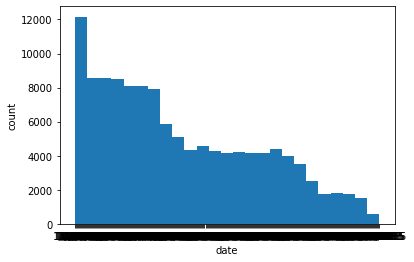

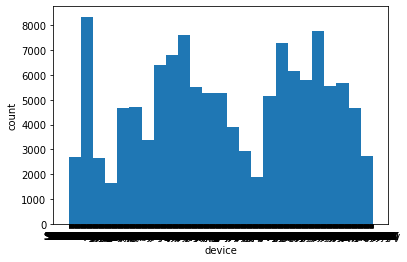

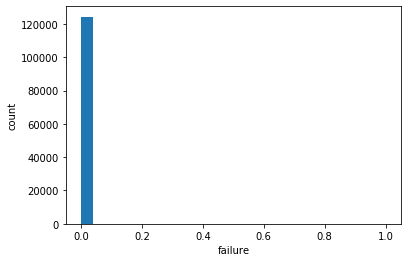

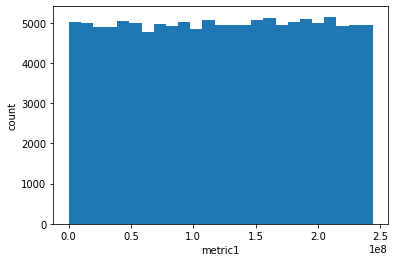

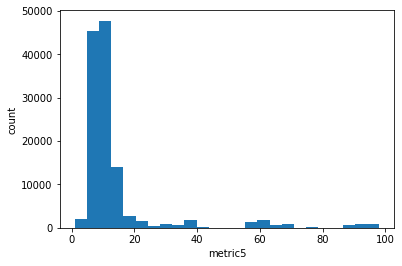

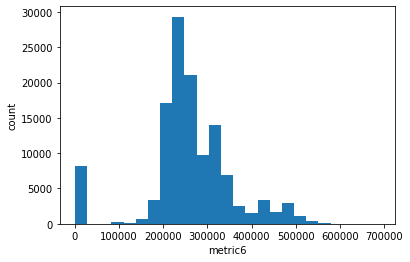

In [13]:
#Univariate analysis of dependent feature.
for feature in df.columns:
    plt.hist(df[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

### Analyze descrite values of numerical variable and cardenality of categorical variable 

In [14]:
#Analyze in numerical values to indetify if and discret 
for feature in df.columns:
#     print(feature,len(df[feature].unique()))
      print(df[feature].value_counts())
      print("*********************************************")  

1/3/2015      1163
1/2/2015      1163
1/4/2015      1162
1/5/2015      1160
1/1/2015      1134
              ... 
10/31/2015      31
10/30/2015      31
10/27/2015      31
10/29/2015      31
11/2/2015       31
Name: date, Length: 304, dtype: int64
*********************************************
S1F0H6JG    304
S1F0GGPP    304
W1F0SJJ2    304
S1F0E9EP    304
S1F0GPXY    304
           ... 
S1F03RV3      4
S1F0RRB1      4
W1F0WJFT      3
S1F04KSC      3
W1F1DA5ÿ      1
Name: device, Length: 1169, dtype: int64
*********************************************
0    124359
1        76
Name: failure, dtype: int64
*********************************************
89196552     26
165048912    26
57192360     26
169490248    23
89162648     15
             ..
130283560     1
240315144     1
153589344     1
141393336     1
133464400     1
Name: metric1, Length: 123820, dtype: int64
*********************************************
8     22141
9     13592
11    12787
10    11478
7     11263
12     9838
6      8

### Identify outliers 

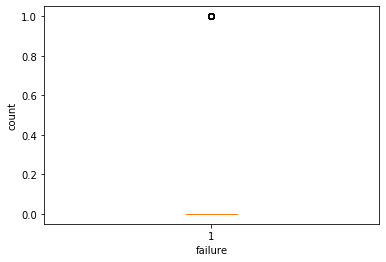

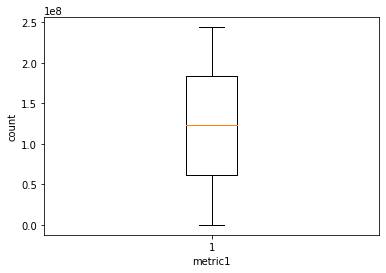

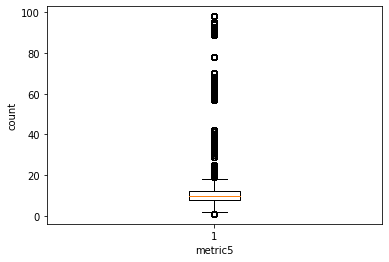

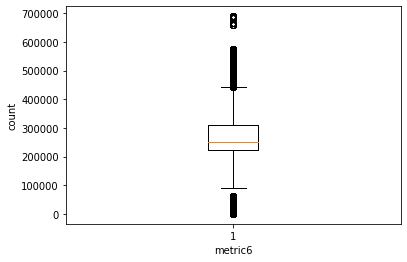

In [15]:
#Check outlier 
for feature in df.columns:
    if(feature!='date' and feature!='device'):
        plt.boxplot(df[feature])
        plt.xlabel(feature)
        plt.ylabel("count")
        plt.show()

##### Problem: device feature has more than 1000 categories . If we perform pd.get_dummies then it will create additional 1000 columns/dimentio which may lead to curse of dimenstion issue . Therefore , trying a two different approach .
#### Approch 1 :
#### we have taken 20 most important categories and created columns for them.

In [16]:
print("unique labels present in the device column is :",len(df['device'].unique()))

unique labels present in the device column is : 1169


In [17]:
df['device'].value_counts().sort_values(ascending=False).head(20)

S1F0H6JG    304
Z1F0KKN4    304
Z1F0GE1M    304
S1F0EGMT    304
W1F0JH87    304
Z1F0QL3N    304
Z1F0MA1S    304
Z1F0KJDS    304
W1F0JY02    304
Z1F0QLC1    304
W1F0JXDL    304
S1F0GCED    304
S1F0KYCR    304
W1F0FZPA    304
W1F0FY92    304
S1F0FP0C    304
W1F0G9T7    304
Z1F0GB8A    304
S1F0GGPP    304
W1F0SJJ2    304
Name: device, dtype: int64

In [18]:
top20=[i for i in df['device'].value_counts().sort_values(ascending=False).head(20).index]


In [19]:
# for lable in top10:
#     df[lable]=np.where(df['device']==lable,1,0)
    
# df.head(10)
# y=df['failure']
# x=df.drop(['date','failure','device'],axis=1)   

#### Approch 2 :
#### we have obtained the counts for each one of the labels in variable 'device'.That means , we have get the count of each categories and repalce them with values .

In [20]:
# let's obtain the counts for each one of the labels in variable 'device'
# let's capture this in a dictionary that we can use to re-map the labels

df_frequency_map=df['device'].value_counts().to_dict()
# and now we replace X2 labels in the dataset df
df['device'] = df['device'].map(df_frequency_map)

df.head()

y=df['failure']
x=df.drop(['date','failure'],axis=1)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
    

## KNN - Without handeling imbalanced data set. Does not make any sence , eventhough did it for self satisfaction.

In [22]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [23]:
knn.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
accuracy={}
acc=knn.score(x_test,y_test)*100
accuracy['KNearestNeighbors']=acc

knn_predict=knn.predict(x_test)
knn_cm=confusion_matrix(knn_predict,y_test)
print(knn_cm)
knn_as=classification_report(knn_predict,y_test)
print(knn_as)

[[24869    18]
 [    0     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24887
           1       0.00      0.00      0.00         0

    accuracy                           1.00     24887
   macro avg       0.50      0.50      0.50     24887
weighted avg       1.00      1.00      1.00     24887



C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# conda install -c conda-forge imbalanced-learn

#### The most tricky part of the dataset is its imabalanced neature.In 'failure' feature 99.9% are '0' and only .1% is '1' category.We can handle this by using 2 approach .

### Approach- 1:
### Using undersampling : In this approach , we will loose many relivent information .


In [26]:
from imblearn.under_sampling import NearMiss

In [27]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(x,y)

C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [28]:
X_res.shape,y_res.shape

((152, 4), (152,))

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=100)

#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

knn.predict(x_test)

accuracy={}
acc=knn.score(x_test,y_test)*100
accuracy['KNearestNeighbors']=acc

knn_predict=knn.predict(x_test)
knn_cm=confusion_matrix(knn_predict,y_test)
print(knn_cm)
knn_as=classification_report(knn_predict,y_test)
print(knn_as)


[[16  5]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        21
           1       0.67      1.00      0.80        10

    accuracy                           0.84        31
   macro avg       0.83      0.88      0.83        31
weighted avg       0.89      0.84      0.84        31



### Approach- 2:
### Using oversampling- I think this lead us to overfitting - needs to be investigated

In [30]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [31]:
os =  RandomOverSampler(ratio=1)

In [32]:
X_train_res, y_train_res = os.fit_sample(x,y)

C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
X_train_res.shape,y_train_res.shape

((248718, 4), (248718,))

In [34]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(ratio=1)

X_train_res1, y_train_res1 = os_us.fit_sample(x, y)

C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
X_train_res1.shape,y_train_res1.shape

((232444, 4), (232444,))

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train_res1,y_train_res1,test_size=0.2,random_state=100)

## KNN

In [37]:


#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

knn.predict(x_test)

accuracy={}
acc=knn.score(x_test,y_test)*100
accuracy['KNearestNeighbors']=acc

knn_predict=knn.predict(x_test)
knn_cm=confusion_matrix(knn_predict,y_test)
print(knn_cm)
knn_as=classification_report(knn_predict,y_test)
print(knn_as)


[[19871  2543]
 [ 3461 20614]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     22414
           1       0.89      0.86      0.87     24075

    accuracy                           0.87     46489
   macro avg       0.87      0.87      0.87     46489
weighted avg       0.87      0.87      0.87     46489



## Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression

logisticregression=LogisticRegression()
logisticregression.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
accuracy={}
acc=logisticregression.score(x_test,y_test)*100
accuracy['LogisticRegression']=acc
lr_predict=logisticregression.predict(x_test)
lr_cm=confusion_matrix(lr_predict,y_test)
print(lr_cm)
lr_as=classification_report(lr_predict,y_test)
print(lr_as)

[[10042 10311]
 [13290 12846]]
              precision    recall  f1-score   support

           0       0.43      0.49      0.46     20353
           1       0.55      0.49      0.52     26136

    accuracy                           0.49     46489
   macro avg       0.49      0.49      0.49     46489
weighted avg       0.50      0.49      0.49     46489



## K Neighbors classifiers

In [40]:
from sklearn.neighbors import KNeighborsClassifier
kclassifier=[]
for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    kclassifier.append(score.mean())
    


In [41]:
print(kclassifier)

[0.9126890232097916, 0.8818645270924305, 0.8820151003463185, 0.8764869108821441, 0.8726365376755791, 0.8708511690937641, 0.8647421970788789, 0.864161414528168, 0.8593000494740691, 0.8594721331927982, 0.8538148809395771, 0.8539009227989417, 0.848910494955796, 0.848759921701908, 0.8444363182688378, 0.8444363182688378, 0.8405859450622728, 0.8412742799371894, 0.8372948439415776, 0.8378110950977651, 0.834541504441911, 0.8350147346684161, 0.8313794661102626, 0.8309492568134398]


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

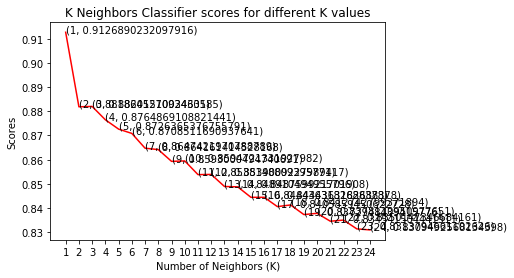

In [42]:
plt.plot([k for k in range(1, 25)],kclassifier,color="red")
for i in range(1,25) :
    plt.text(i,kclassifier[i-1],(i,kclassifier[i-1]))
plt.xticks([i for i in range(1, 25)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

## SVM

In [43]:
# from sklearn.svm import SVC
# svm=SVC(random_state=1)
# svm.fit(x_train,y_train)
# acc=svm.score(x_test,y_test)*100
# accuracy['SupportvectorMachine']=acc

# svm_predict=svm.predict(x_test)
# svm_cm=confusion_matrix(svm_predict,y_test)
# print(svm_cm)
# svm_as=classification_report(svm_predict,y_test)
# print(svm_as)

## Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
acc=nb.score(x_test,y_test)*100
accuracy['NaiveBayes']=acc

nb_predict=nb.predict(x_test)
nb_cm=confusion_matrix(nb_predict,y_test)
print(nb_cm)
nb_as=classification_report(nb_predict,y_test)
print(nb_as)

[[ 5444  5145]
 [17888 18012]]
              precision    recall  f1-score   support

           0       0.23      0.51      0.32     10589
           1       0.78      0.50      0.61     35900

    accuracy                           0.50     46489
   macro avg       0.51      0.51      0.47     46489
weighted avg       0.65      0.50      0.54     46489



## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
acc=dt.score(x_test,y_test)*100
accuracy['DecisionTreeClassifier']=acc

dt_predict=dt.predict(x_test)
dt_cm=confusion_matrix(dt_predict,y_test)
print(dt_cm)
dt_as=classification_report(dt_predict,y_test)
print(dt_as)

[[23189    46]
 [  143 23111]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23235
           1       1.00      0.99      1.00     23254

    accuracy                           1.00     46489
   macro avg       1.00      1.00      1.00     46489
weighted avg       1.00      1.00      1.00     46489



## Random Forest


In [46]:
accuracy={}
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train,y_train)
acc=rf.score(x_test,y_test)*100
accuracy['RandomForestClassifier']=acc

rf_predict=rf.predict(x_test)
rf_cm=confusion_matrix(rf_predict,y_test)
print(rf_cm)
rf_as=classification_report(rf_predict,y_test)
print(rf_as)

[[23259     9]
 [   73 23148]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23268
           1       1.00      1.00      1.00     23221

    accuracy                           1.00     46489
   macro avg       1.00      1.00      1.00     46489
weighted avg       1.00      1.00      1.00     46489



In [47]:
accuracy.values()

dict_values([99.82361418830261])

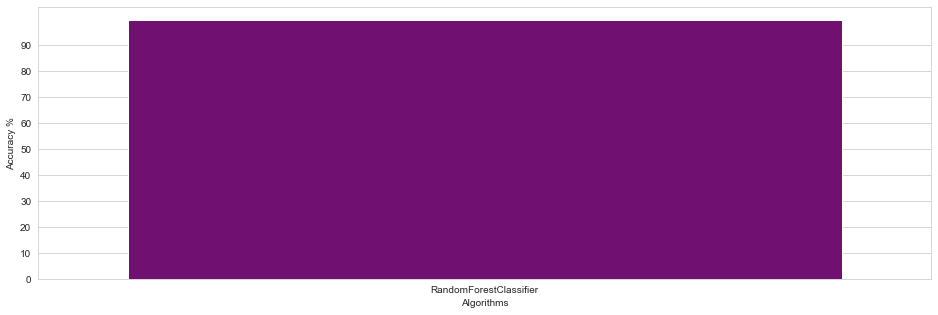

In [48]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette=colors)
plt.show()

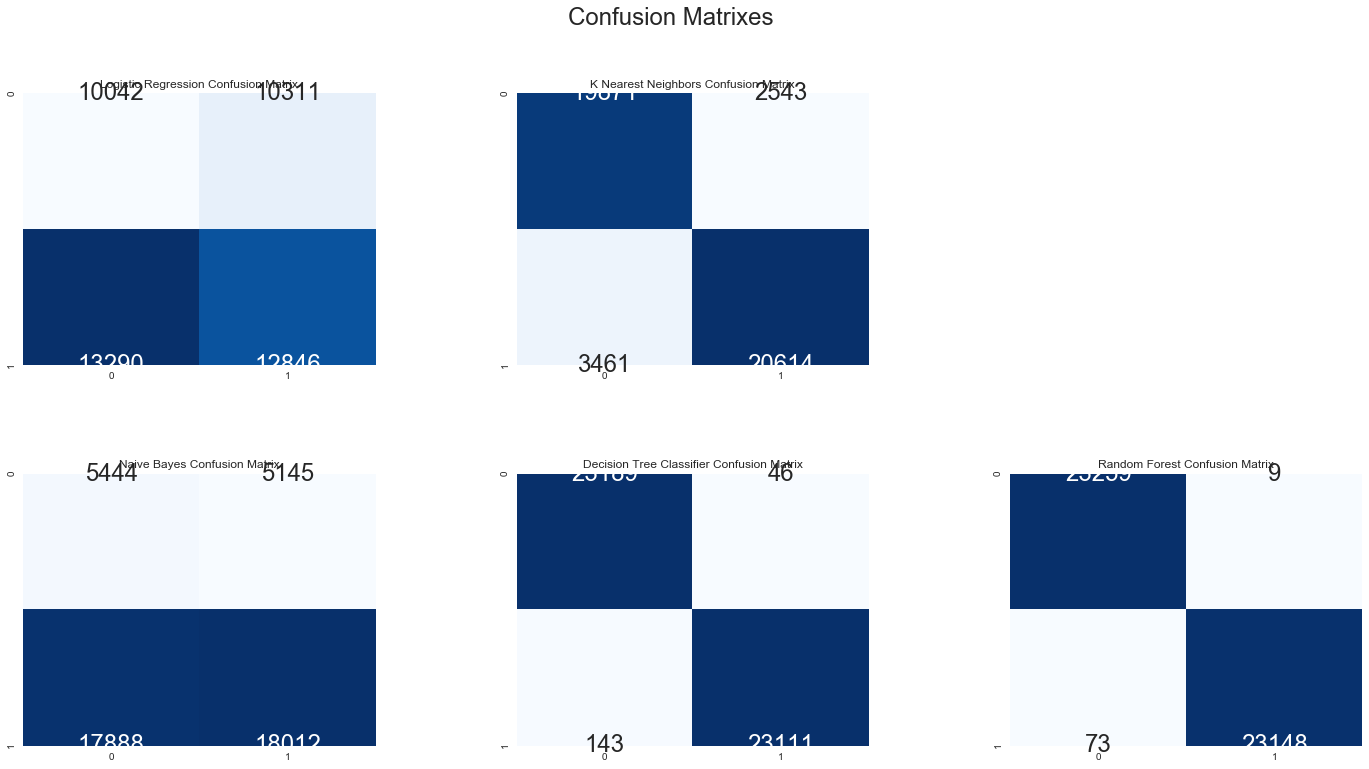

In [49]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# plt.subplot(2,3,3)
# plt.title("Support Vector Machine Confusion Matrix")
# sns.heatmap(svm_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(nb_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(dt_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(rf_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

#### Test The model . Here , we have taken out 30 positive and negative rows from main dataset and model have not seen those data yet. Lets feed those information to the model and check accuracy.

In [50]:
df_test=pd.read_csv("C:/Users/chbhakat/Desktop/DS/Kaggle/AmazonInterview_PredictMaintenance/Test.csv")
df_test.head(10)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/5/2015,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
1,1/7/2015,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
2,1/9/2015,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
3,1/13/2015,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
4,1/14/2015,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0
5,1/17/2015,W1F0T034,1,154998752,1312,0,18,10,306996,0,0,0
6,1/18/2015,S1F0GG8X,1,54292264,64736,0,160,11,192179,0,0,2
7,1/19/2015,S1F023H2,1,64499464,0,0,1,19,514661,16,16,3
8,1/19/2015,S1F0QY11,1,159635352,0,0,9,7,231336,16,16,0
9,1/19/2015,S1F0S2WJ,1,238299872,1184,0,0,14,268662,8,8,0


In [51]:
df_test.drop(['metric2','metric3','metric4','metric7','metric8','metric9'],axis=1,inplace=True)

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
date       59 non-null object
device     59 non-null object
failure    59 non-null int64
metric1    59 non-null int64
metric5    59 non-null int64
metric6    59 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.9+ KB


In [53]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

In [54]:
# scaling_mimmax=MinMaxScaler()
# df_test[['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric8']]=scaling_mimmax.fit_transform(df_test[['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric8']])

In [55]:
# let's obtain the counts for each one of the labels in variable 'device'
# let's capture this in a dictionary that we can use to re-map the labels

df_frequency_map=df_test['device'].value_counts().to_dict()
# and now we replace X2 labels in the dataset df
df_test['device'] = df_test['device'].map(df_frequency_map)

df_test.head()
y_test_model=df_test['failure']
x_test_model=df_test.drop(['date','failure'],axis=1)

In [56]:
y_test_model.shape,x_test_model.shape

((59,), (59, 4))

In [57]:
df_test.head()

,date,device,failure,metric1,metric5,metric6
0,1/5/2015,1,1,48467332,8,39267
1,1/7/2015,1,1,184069720,9,387871
2,1/9/2015,1,1,136429411,30,224801
3,1/13/2015,1,1,188251248,6,39345
4,1/14/2015,1,1,220461296,14,325125


### Test the model with test data(60 rows) using Random forest

In [58]:
rf_predict_model=rf.predict(x_test_model)
rf_cm_model=confusion_matrix(rf_predict_model,y_test_model)
print(rf_cm_model)
rf_as_model=classification_report(rf_predict_model,y_test_model)
print(rf_as_model)

[[29 30]
 [ 0  0]]
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        59
           1       0.00      0.00      0.00         0

    accuracy                           0.49        59
   macro avg       0.50      0.25      0.33        59
weighted avg       1.00      0.49      0.66        59



C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Test the model with test data(60 rows) using Naive bayes 

In [59]:
nb_predict_model=nb.predict(x_test_model)
nb_cm_model=confusion_matrix(nb_predict_model,y_test_model)
print(nb_cm_model)
nb_as_model=classification_report(nb_predict_model,y_test_model)
print(nb_as_model)

[[17  6]
 [12 24]]
              precision    recall  f1-score   support

           0       0.59      0.74      0.65        23
           1       0.80      0.67      0.73        36

    accuracy                           0.69        59
   macro avg       0.69      0.70      0.69        59
weighted avg       0.72      0.69      0.70        59



In [60]:
knn_predict=knn.predict(x_test_model)
knn_cm=confusion_matrix(knn_predict,y_test_model)
print(knn_cm)
knn_as=classification_report(knn_predict,y_test_model)
print(knn_as)

[[22 25]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.76      0.47      0.58        47
           1       0.17      0.42      0.24        12

    accuracy                           0.46        59
   macro avg       0.46      0.44      0.41        59
weighted avg       0.64      0.46      0.51        59



In [61]:
lr_predict=logisticregression.predict(x_test_model)
lr_cm=confusion_matrix(lr_predict,y_test_model)
print(lr_cm)
lr_as=classification_report(lr_predict,y_test_model)
print(lr_as)

[[16 12]
 [13 18]]
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        28
           1       0.60      0.58      0.59        31

    accuracy                           0.58        59
   macro avg       0.58      0.58      0.58        59
weighted avg       0.58      0.58      0.58        59



In [62]:
dt_predict=dt.predict(x_test_model)
dt_cm=confusion_matrix(dt_predict,y_test_model)
print(dt_cm)
dt_as=classification_report(dt_predict,y_test_model)
print(dt_as)

[[29 30]
 [ 0  0]]
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        59
           1       0.00      0.00      0.00         0

    accuracy                           0.49        59
   macro avg       0.50      0.25      0.33        59
weighted avg       1.00      0.49      0.66        59



C:\Users\chbhakat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
